# Analytical Heat Eqaution

Begin by exploring the 1D heat equation

$u_{t}=k u_{xx}$ for $x \in (0,1)$ for $t>0$

$u(x,0)=f(x)$
$u(0,t)=$
$u(l,t)=$

$\alpha = \frac{k}{\rho C_{p}}$
Assumptions:
- No heat generation
- Uniform material properties



$T(x,t) = T_{s}+(T_{i}-T_{s})erf(\frac{x}{2 \sqrt{\alpha t}})$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PDE_FIND import *
import pysindy as ps

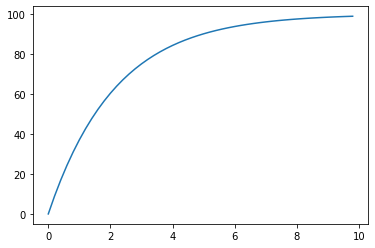

In [2]:
# Using lumped mass approximation

T_inf = 100   # Surrounding temperature
T_i = 0       # Initial temperature
r =  1/2000   # Radius of sphere
h = 210       # Convection heat transfer coefficient
rho = 8500    # Material density

As = 4 * np.pi * r**2    # Surface area
V = (4/3) * np.pi * r**3 # Volume
Cp = 320      # Specific heat

tf = 10       # Experiment time
dt = 0.2      # Timestep

t = np.arange(0,tf, dt) # Time array
b = (h * As)/(rho * V * Cp)

def T(t):
    return(T_inf + (T_i - T_inf) * np.exp(-b*t))

Temps = T(t)
plt.plot(t, Temps)

In [3]:
model = ps.SINDy(feature_names=["T"])
model.fit(Temps, t=t)
model.print()

T' = 46.375 1 + -0.464 T


In [11]:
# Evolve heat transfer system in time using a different initial condition

T_inf = 150   # Surrounding temperature
T_i = -10       # Initial temperature

Temps2 = T(t)

T_inf = 150   # Surrounding temperature
T_i = 0       # Initial temperature

Temps3 = T(t)

T_inf = 90   # Surrounding temperature
T_i = 0       # Initial temperature

Temps4 = T(t)

print('Model score: %f' % model.score(Temps2, t=t))
print('Model score: %f' % model.score(Temps3, t=t))
print('Model score: %f' % model.score(Temps4, t=t))

Model score: -0.433443
Model score: -0.630908
Model score: 0.818787


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
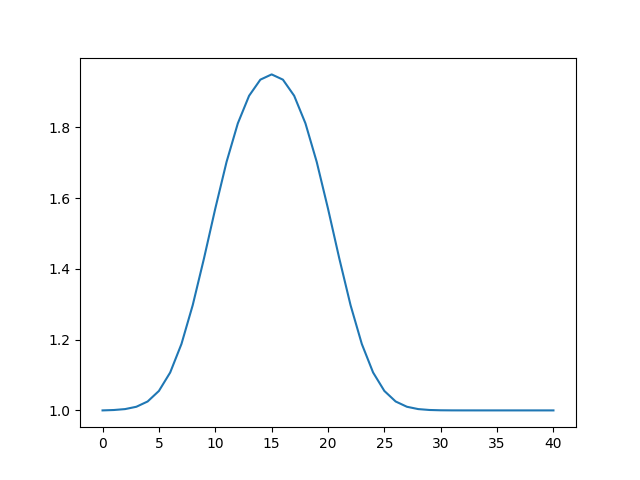

In [3]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from IPython.display import HTML

fig, ax = plt.subplots()


nx = 41
dx = 2 / (nx - 1)
nt = 20    #the number of timesteps we want to calculate
t_stop = 0.5
nu = 0.3   #the value of viscosity/thermal conductivity
sigma = .2 #sigma is a parameter, we'll learn more about it later
dt = sigma * dx**2 / nu #dt is defined using sigma ... more later!

t = np.arange(0, t_stop, dt)

def q(T, t):
    dTdt = np.zeros_like(T)
    dTdt[0] = T[1]
    
    delta = T[2] - T[0]
    

u = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

un = np.ones(nx) #our placeholder array, un, to advance the solution in time

for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx - 1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
        #plt.plot(np.linspace(0, 2, nx), u);
        
plt.plot(u)

In [ ]:
plt.plot()